The interaction between preys and predators in a ecological system can be captured with a simple model, known as the Lotka-Volterra competition model.

Let $U(t)$ and $V(t)$ be the population size of the preys and the predators at a given time $t$. The change in the populations through time is described by a set of differential equations:
$$
\begin{aligned}
\frac{dU}{dt} &= \alpha U - \gamma UV \\
\frac{dV}{dt} &= - \beta V + e\gamma UV 
\end{aligned}
$$

The first term on the right hand side of each equation, i.e., the $\alpha$ and $\beta$ terms, describe the trend of change in the population siz if that species is left alone. Assume that there is always ample food resource for the preys, then their population size will grow in absence of predators. On the other hand, preys will die if there is no preys to eat, so their population size will decrease in absence of preys. These considerations give rise to the positive and negative signs before the $\alpha$ and $\beta$ terms.

The cross terms, i.e., the $UV$ terms, represent the interaction between the two species. $\gamma$ can be thought as the fraction of prey being caught by predators per unit time, so the total number of prey caught in $dt$ is $\gamma dt \cdot UV$. For the predators, catching more preys means they can give birth to more cubs. As there could be some conversion factor which we call $e$, hence the number of newborns for predators in $dt$ is $e\gamma dt \cdot UV$. So the second term on the right hand side depicts this prey-predator interaction.

With normalization $\tau = \sqrt{\alpha \beta} t$, $u = \frac{e\gamma}{\beta}U$, and $v = \frac{\gamma}{\alpha}V$, the Lotka-Volterra equations can be reduced to the following form:
$$
\begin{aligned}
\frac{du}{dt} &= r(u - uv) \\
\frac{dv}{dt} &= \frac{1}{r}(v + uv) 
\end{aligned}
$$

So instead of four parameters, $\alpha$, $\beta$, $\gamma$ and $e$, this model can be parametrized with just one constant $r$, given by
$$
r = \sqrt{\frac{\alpha}{\beta}}
$$

The Lotka-Volterra equations are non-linear and do not have a simple analytical solution, although they predict a regular periodic cycle in the population size. In the simulation that follows, we study the numerical solutions to the Lotka-Volterra equations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [2]:
# define the lotka-volterra prey-predator model
# u = relative number of preys
# v = relative number of predators
# r = dimensionless parameter
def lotka_volterra(uv, t, r):
    u, v = uv
    dudt = r * (u - u*v)
    dvdt = 1/r * (u*v - v)
    return [dudt, dvdt]

In [3]:
# set up the number of phase portraits to plot
step = 0.2
n_step = 7

# plotting of phase diagram for a given r
def phase_diagram(r):
    u0 = np.arange(1.1, 1.1 + n_step*step, step)
    
    for i in range(n_step):
        sol = odeint(lotka_volterra, [u0[i], 1.1], t, args=(r,))
        plt.plot(sol[:, 0], sol[:, 1], 'black')
    
    plt.xlabel('prey')
    plt.ylabel('predator')
    plt.title('r = ' + str(r), loc='center')
    plt.ylim([0, 4.5])
    plt.grid()
    plt.show()

# plotting variation of number of preys and predators for a given r
def time_var(r, initial_uv):
    sol = odeint(lotka_volterra, initial_uv, t, args=(r,))
    plt.plot(t, sol[:, 0], 'green', label='prey')
    plt.plot(t, sol[:, 1], 'red', label='predator')
    plt.xlabel('time')
    plt.ylabel('number')
    plt.ylim([0.4, 1.6])
    plt.legend(loc='upper right')
    plt.title('r = ' + str(r), loc='center')
    plt.grid()
    plt.show()

In [4]:
# set up duration for the simulation
t = np.linspace(0, 10, 200)

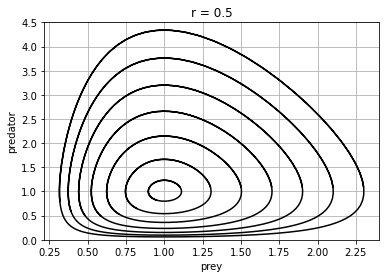

In [5]:
phase_diagram(0.5)

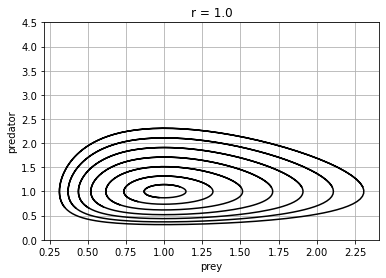

In [6]:
phase_diagram(1.0)

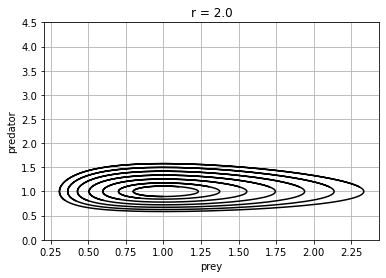

In [7]:
phase_diagram(2.0)

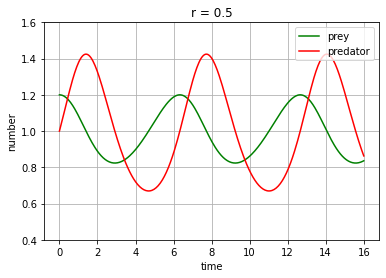

In [8]:
# set up duration for the simulation
t = np.linspace(0, 16, 300)
time_var(0.5, [1.2, 1.0])

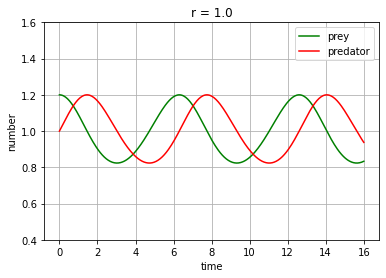

In [9]:
time_var(1.0, [1.2, 1.0])

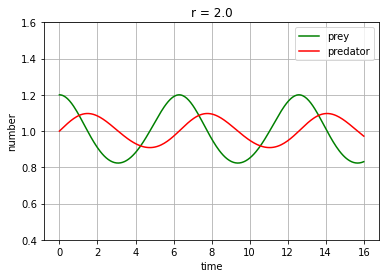

In [10]:
time_var(2.0, [1.2, 1.0])

In [11]:
# compare phase portraits for different values of r given the same initial values for u and v
r_candidates = [0.5, 0.7, 1.0, 1.4, 2.0]
t = np.linspace(0, 10, 200)

def compare_r(initial_uv):
    for r in r_candidates:
        sol = odeint(lotka_volterra, initial_uv, t, args=(r,))
        plt.plot(sol[:, 0], sol[:, 1], label='r = '+str(r))
    
    plt.xlabel('prey')
    plt.ylabel('predator')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

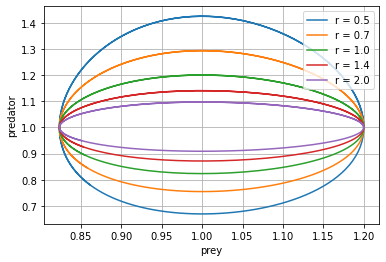

In [12]:
compare_r([1.2, 1.0])

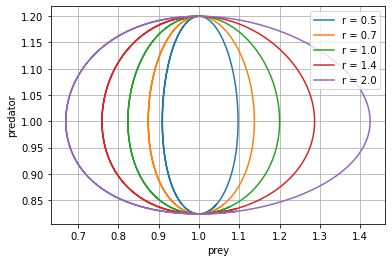

In [13]:
compare_r([1.0, 1.2])